# <span style="color:darkred"><ins>A model to profile long-term employees in a company.</ins></span>

When running a business, it takes money to make money. You make spending decisions every day for the betterment of your company. One of the most important investments you can make is in new people. 

* Hiring takes a lot of skills, patience, time and money.Most of all, small business owners spend around 40% of their working hours on tasks that do not generate income, such as hiring.

* Companies spend from 15% to 20% of the employee’s annual salary, with more senior positions on the higher end of the scale. 

* It's known that an average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed.

* Hiring an employee in a company with 0-500 people costs an average of $7,645.

* The average company in the United States spends about $4,000 to hire a new employee, taking up to 52 days to fill a position.

Our goal is to predict which employees are most likely to quit their job and a dataset has been provided to us.

***Sources:*** 

* <span style="color:blue">[https://toggl.com/blog/cost-of-hiring-an-employee](https://toggl.com/blog/cost-of-hiring-an-employee)</span>
* <span style="color:blue">[https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)</span>

# 1 - Import the libraries and look at the dataset.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
employee_df=pd.read_csv("Human_Resources.csv")
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* We need to predict the **Attrition's** feature.

In [59]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [60]:
employee_df.info()
# 35 features in total with 1470 data points each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [61]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


    We can observe that the average age of the company is around 37 years and that the average number of years in the company is 7. Later we will go deeper into these and other features.

In [62]:
cat_columns = [cname for cname in employee_df.columns if employee_df[cname].dtype == "object"]

for i in cat_columns:
    if i != 'Date' and i!= 'Time':
        print("%s has %d elements: %s"%(i, len(employee_df[i].unique().tolist()), employee_df[i].unique().tolist()))

Attrition has 2 elements: ['Yes', 'No']
BusinessTravel has 3 elements: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department has 3 elements: ['Sales', 'Research & Development', 'Human Resources']
EducationField has 6 elements: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Gender has 2 elements: ['Female', 'Male']
JobRole has 9 elements: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
MaritalStatus has 3 elements: ['Single', 'Married', 'Divorced']
Over18 has 1 elements: ['Y']
OverTime has 2 elements: ['Yes', 'No']


# 2 - Dataset visualization

  We replace the *'Attrition'*, *'Over18'* and *'overtime'* columns by integers before we can carry out any visualization, because those features are binaries strings ('Yes/No')

In [63]:
employee_df['Attrition'] =employee_df['Attrition'].apply(lambda x: 1 if x== 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)
employee_df['OverTime'] = employee_df['OverTime']. apply(lambda x: 1 if x=='Yes' else 0)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**- Let's see if we're missing data. We'll use a heatmap:**

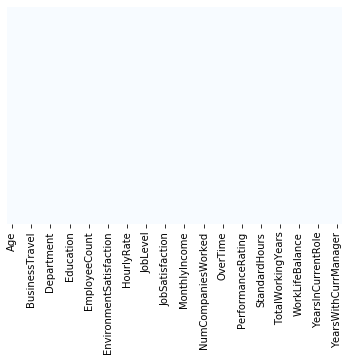

In [64]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0adc21d050>,
      dtype=object)

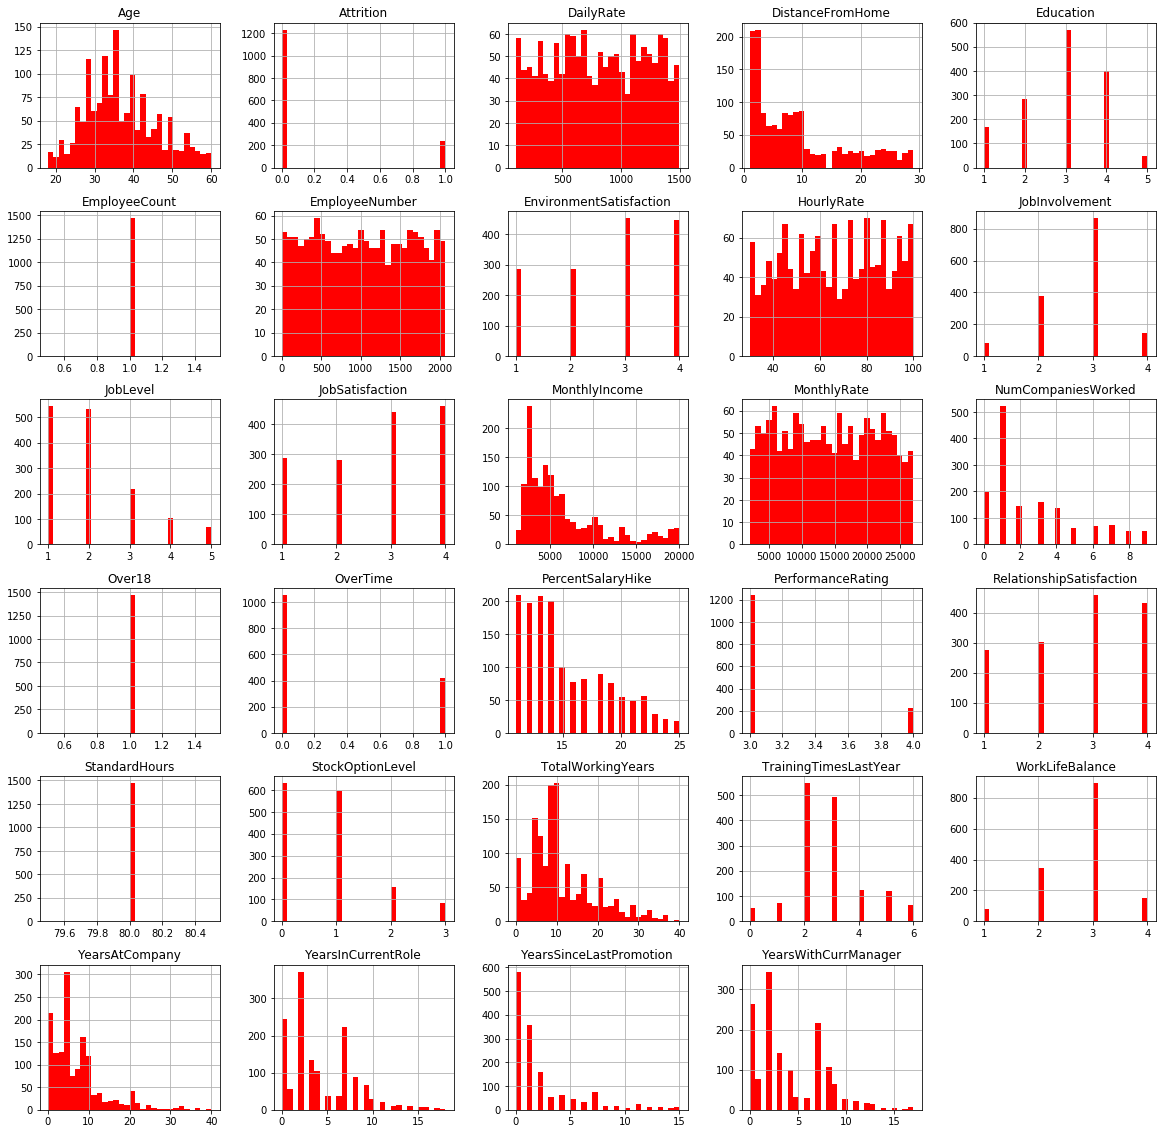

In [65]:
employee_df.hist(bins=30, figsize=(20,20), color='r')

* Some features like *'MonthlyIncome'* and *'TotalWorkingYears'* have a distribution with a very long tail (long tail distribution)

* It makes sense to remove *'EmployeeCount'*, *'Standardhours'* and *'Over18'*, they are fields that don't change from one employee to another one

* We also remove *'EmployeeNumber'*, it belongs to a field to identify employees, it doesn't have any effect in our study.

In [66]:
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis=1, inplace = True)
employee_df.shape

(1470, 31)

**- Let's see how many employees left and stayed in the company:**

In [67]:
left_df = employee_df[employee_df['Attrition']== 1]
stay_df = employee_df[employee_df['Attrition']== 0]

In [68]:
print('Left', round(employee_df['Attrition'].value_counts()[1]/len(employee_df) * 100,2), '% of the dataset')
print('Stay', round(employee_df['Attrition'].value_counts()[0]/len(employee_df) * 100,2), '% of the dataset')

Left 16.12 % of the dataset
Stay 83.88 % of the dataset


We are facing an unbalanced dataset.

**- Now we're going to compare the employees' mean and standard error between those who have left and who have stayed:**

In [69]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [70]:
stay_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


* **'age'**: Employees` average age who stayed is higher than those who left (`37` vs. `33`)
* **'DailyRate'**: Employees` daily rate who stayed is higher.
* **'DistanceFromHome'**: The employees who stayed in the company live closer to work.
* **'EnvironmentSatisfaction'** y **'JobSatisfaction'**: Most of the employees who stayed are more satisfied with their jobs.
* **'StockOptionLevel'**: The employees who stayed have a high level of stocks options.
* **'OverTime'**: The employees who left they worked almost double overtime.

## Correlations between variables:

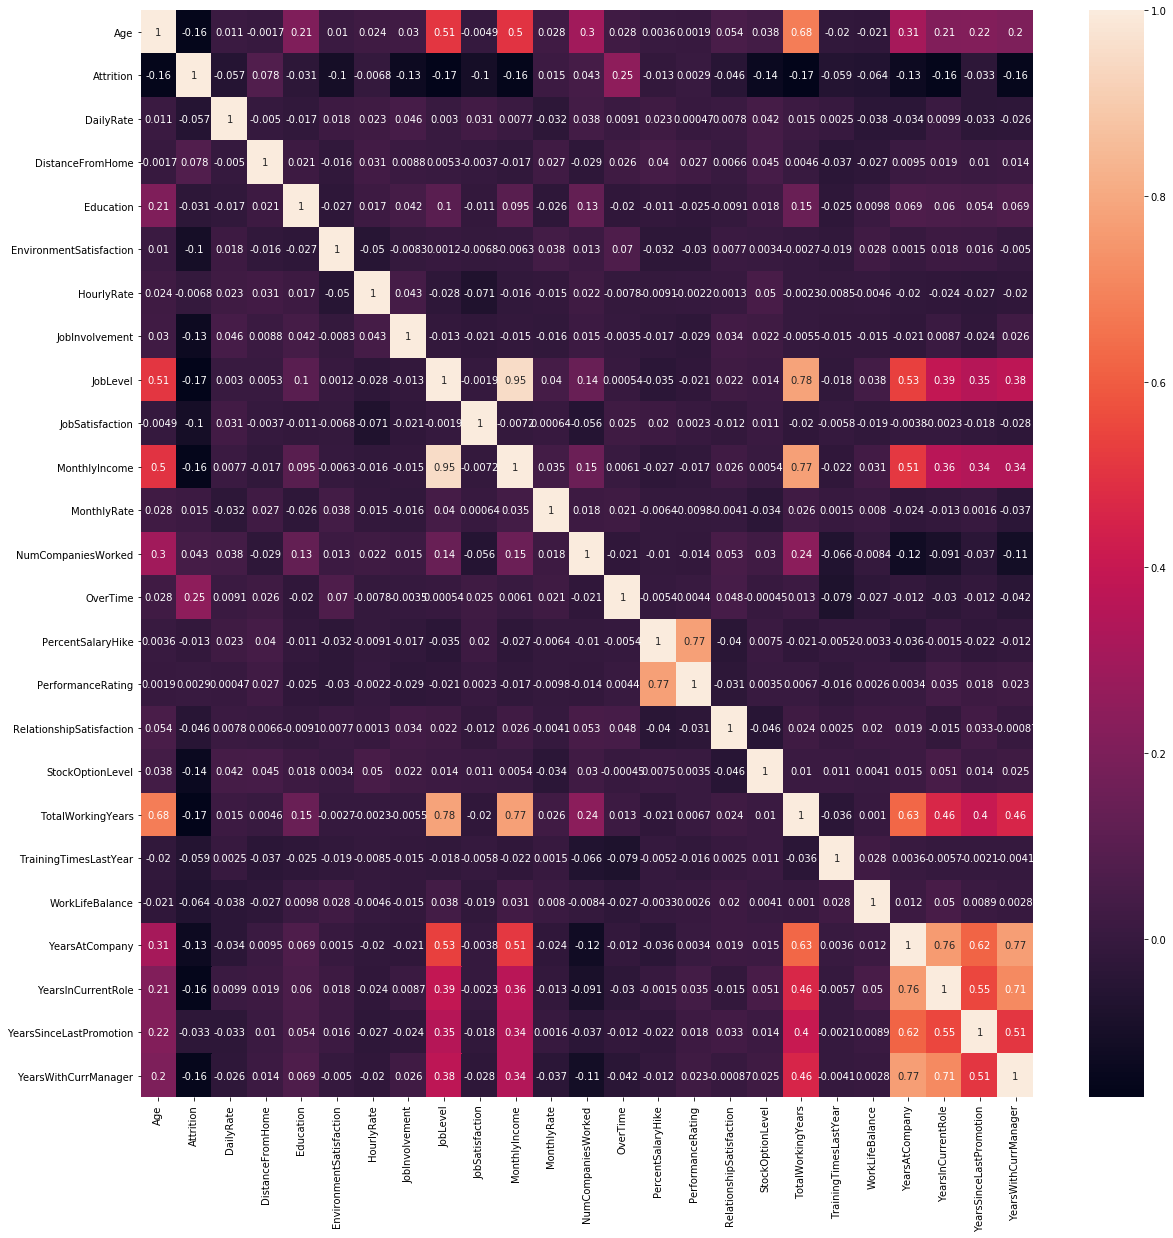

In [71]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)


* **'Job level'** is highly correlated with the total number of working hours.
* **'Monthly income'** is highly correlated with  Job level and with the total number of working hours.
* **'Age'** is highly correlated with the Monthly income.

## We compare the distributions:

### Age vs. Attrition

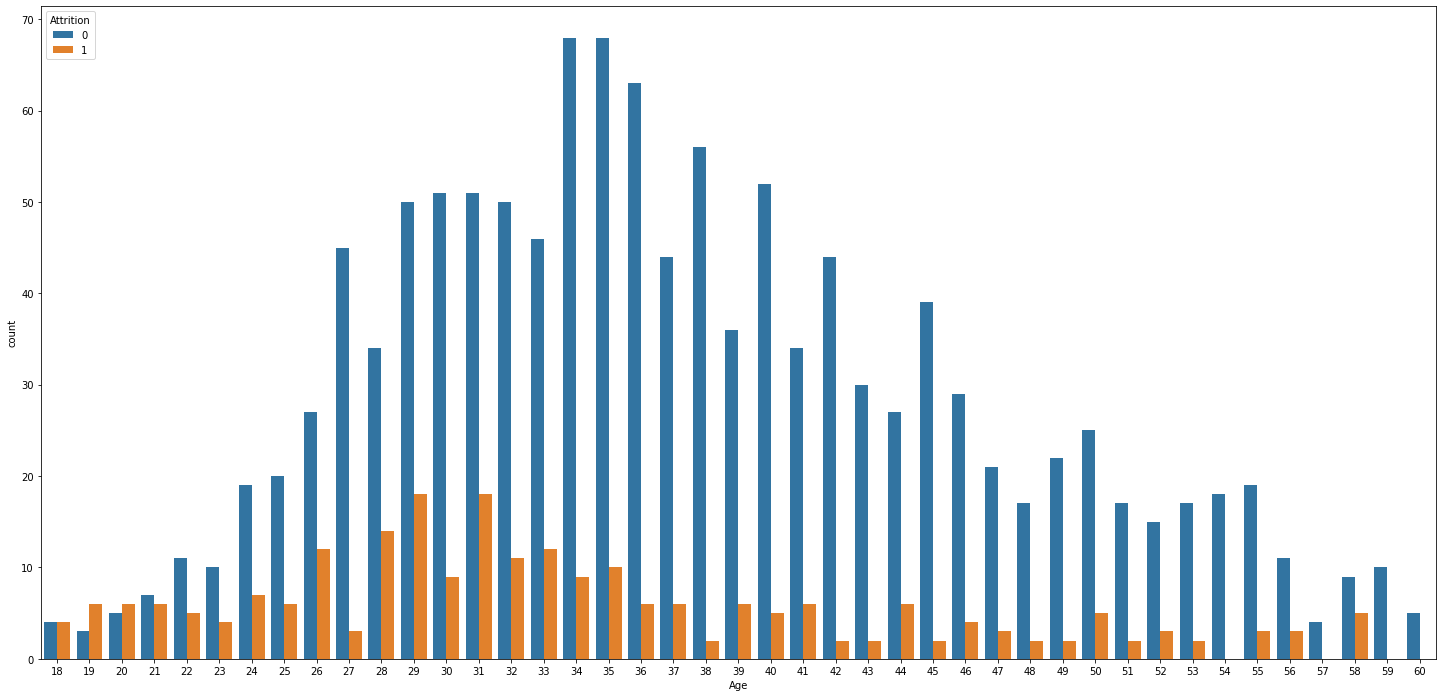

In [72]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data= employee_df)

The people are most likely to leave the company between 26 and 35 yeas old.

### (JobRole & MaritalStatus & JobInvolvement & JobLevel) vs. Attrition 

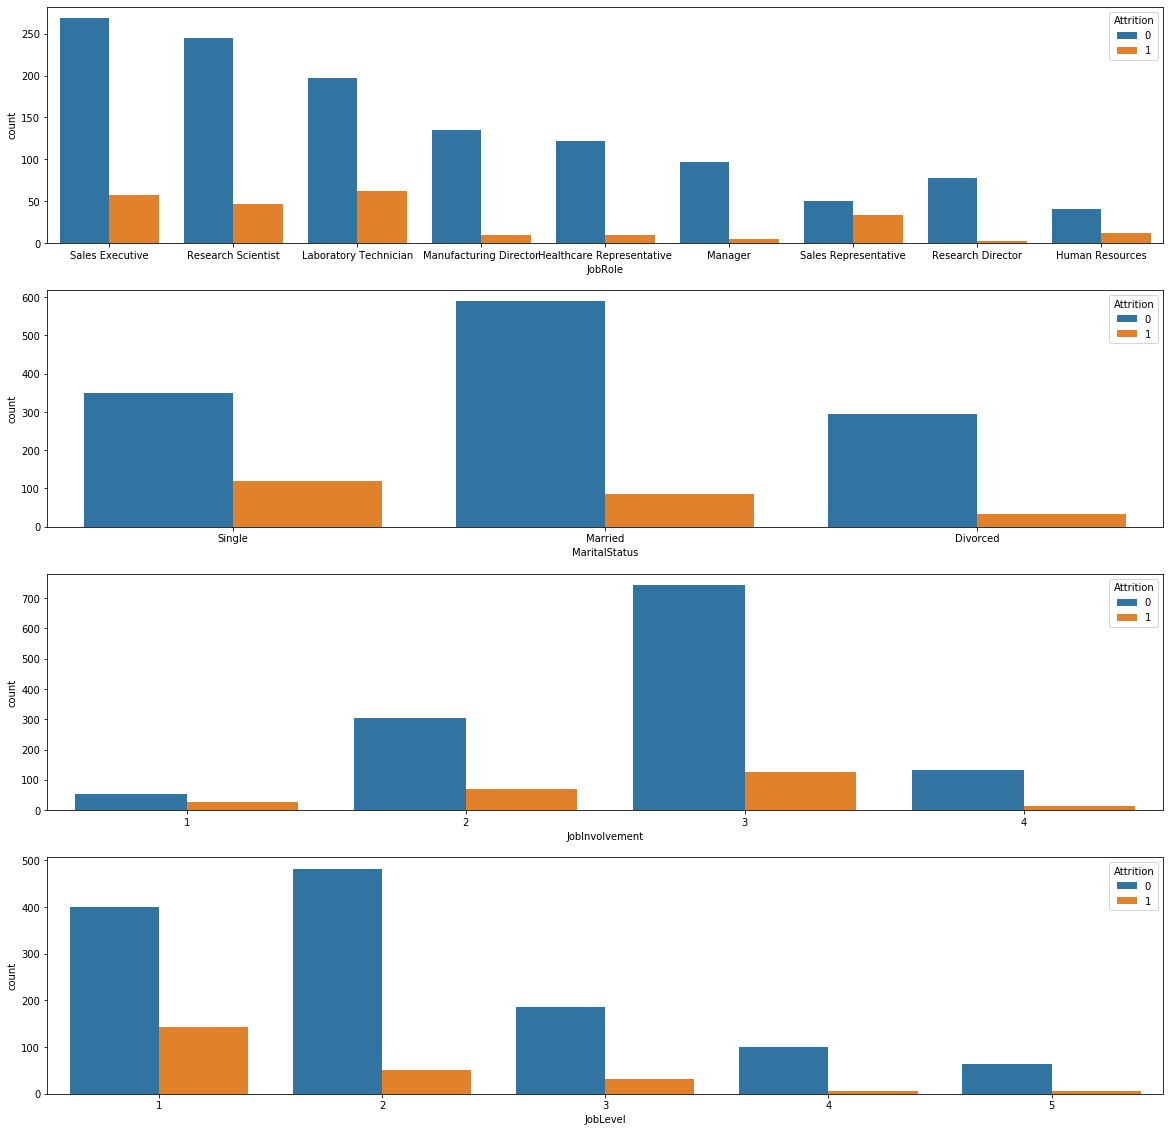

In [73]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data= employee_df)

plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data= employee_df)

plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data= employee_df)

plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data= employee_df)

* Single employees tend to leave the company compared to married and divorced employees.
* Sales Representative us the section the most mobility than the others sections.
* Less involved employees tend to leave the company.
* The employees with a low level tend to leave the company.

##  Probability density estimation:

### Distance from Home vs. Attrition

Text(0.5, 0, 'Distance from home to work')

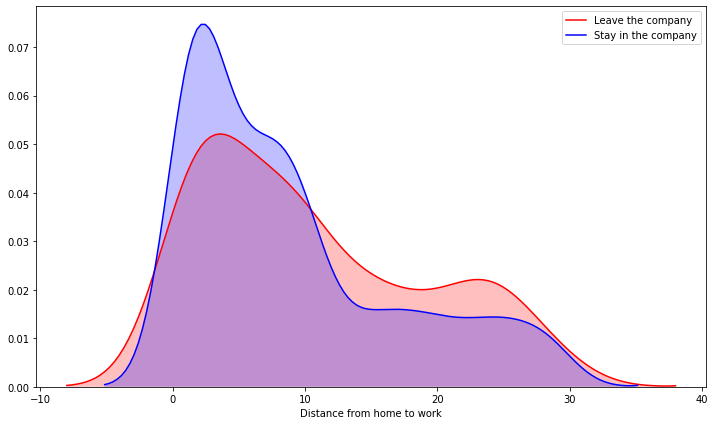

In [74]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Leave the company', shade=True, color='r')
sns.kdeplot(stay_df['DistanceFromHome'], label = 'Stay in the company', shade=True, color='b')

plt.xlabel('Distance from home to work')

In the 10-28 Km range we can see that it could exist some correlation variable between the employees who left ande who stay in the company.

Text(0.5, 0, "Current Manager's years")

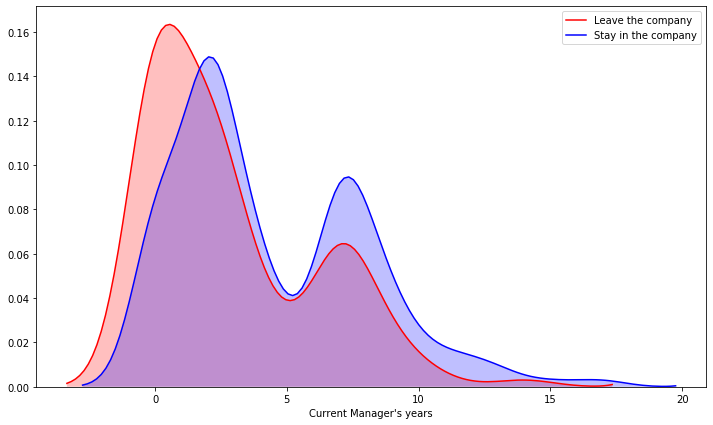

In [75]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Leave the company', shade=True, color='r')
sns.kdeplot(stay_df['YearsWithCurrManager'], label = 'Stay in the company', shade=True, color='b')

plt.xlabel("Current Manager's years")

The less time they are with the same manager, they tend to leave the company more often than if they have been with the same manager for more years.

Text(0.5, 0, 'Total working years')

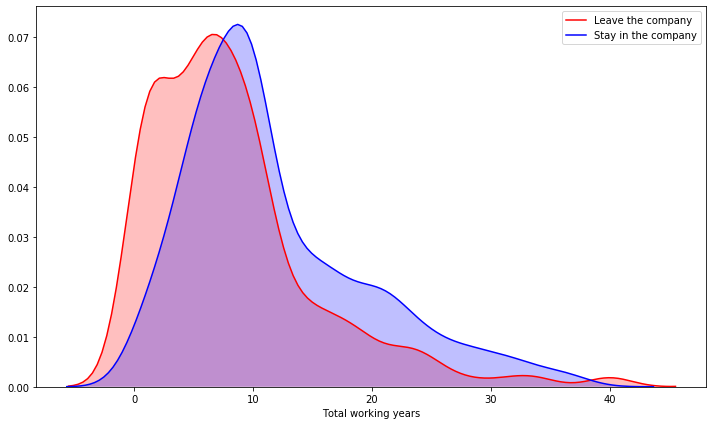

In [76]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Leave the company', shade=True, color='r')
sns.kdeplot(stay_df['TotalWorkingYears'], label = 'Stay in the company', shade=True, color='b')

plt.xlabel('Total working years')

From 10 years the employees tend to stay.

### Gender vs. Monthly Income

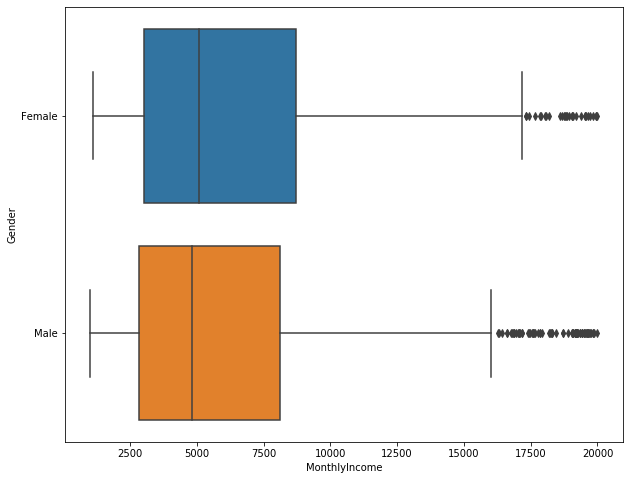

In [77]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

    This company doesn't have wage inequity by gender.

### Monthly Income vs. Job Role

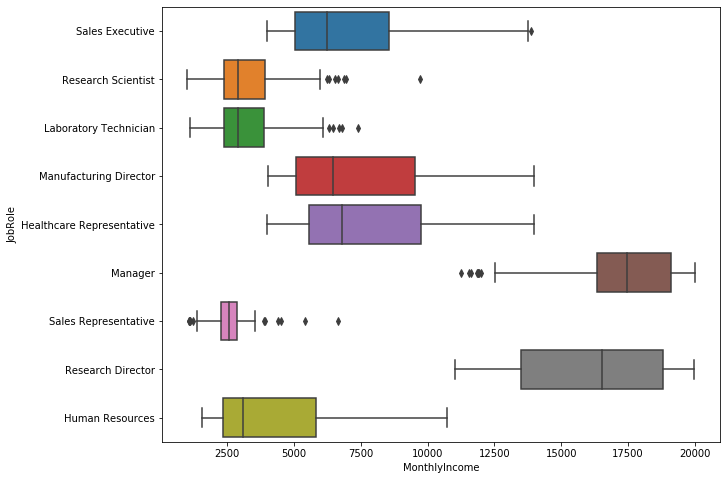

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

* Managers and Research Directors earn more money than the others roles.
* Scientist and Laboratory Technician are poorly paid.
* There's a lot difference between high positions and middle-low positions.

# 3 - Test and training dataset

In [79]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


**- Our categories:**

In [80]:
X_cat=employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [81]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [82]:
X_cat= pd.DataFrame(X_cat)
X_cat  

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**- We only take the numerical variables:**

In [83]:
numerical_columns = [cname for cname in employee_df.columns if (employee_df[cname].dtype == "int64" and cname!='Attrition')]
X_numerical= employee_df[numerical_columns]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


**- We join categorical and numercial tables (without *Attrition*, our target):**

In [84]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


## Reescale the variables

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

**- Our target variable:**

In [86]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# 4 - Training and evaluate a classifier using a Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#25% of the dataset to train.

In [88]:
X_train.shape

(1102, 50)

In [89]:
X_test.shape

(368, 50)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**- We create a logistic model with a train data:**

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**- We use test data to predict:**

In [92]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

* 1 --> The employee leaves
* 0 --> The employe stay

### Let 's see our accuracy

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
print("Accuracy: {}".format(100*accuracy_score(y_pred, y_test)))

Accuracy: 85.86956521739131


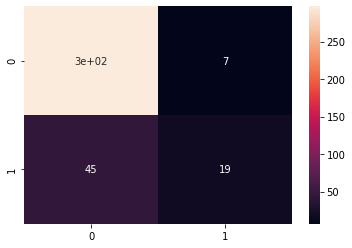

In [95]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

We get a good accuracy(=88%), but we have to check the rest of the paramenters yet.

### We analyze the *Precision* , *Recall*  and *F1-Score*:

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       304
           1       0.73      0.30      0.42        64

    accuracy                           0.86       368
   macro avg       0.80      0.64      0.67       368
weighted avg       0.84      0.86      0.83       368



We get good results for the `0` category, but for the other one is bad.

# 5 - Training and evaluate a clasiffier using Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
y_pred = model.predict(X_test)

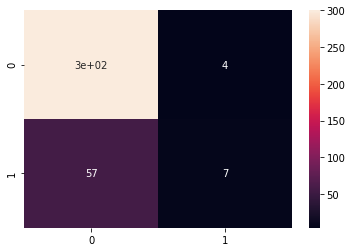

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       304
           1       0.64      0.11      0.19        64

    accuracy                           0.83       368
   macro avg       0.74      0.55      0.55       368
weighted avg       0.80      0.83      0.78       368



We continue to obtain poor results for `1`.

# 6 - Training and evaluate a clasiffier using Deep Learning

In [101]:
import tensorflow as tf

In [102]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [105]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs =100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8385
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3598 - accuracy: 0.8666
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.8820
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2969 - accuracy: 0.8811
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2527 - accuracy: 0.9111
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.9183
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1874 - accuracy: 0.9283
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1449 - accuracy: 0.9419
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1787 - accuracy: 0.9374
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1089 - accuracy: 0.9646
Epoch 11/

In [106]:
y_pred = model.predict(X_test)
y_pred

array([[1.02000641e-09],
       [1.00000000e+00],
       [2.50559333e-06],
       [9.55128326e-06],
       [1.95358858e-08],
       [1.54894892e-07],
       [9.45388039e-12],
       [2.08851762e-14],
       [1.06263491e-10],
       [3.86129813e-08],
       [8.14706087e-04],
       [7.68147324e-10],
       [3.01722114e-14],
       [7.42019329e-05],
       [2.11696668e-16],
       [7.73913540e-14],
       [3.96750295e-07],
       [9.47604895e-01],
       [1.41317411e-08],
       [4.64318573e-01],
       [3.79719260e-13],
       [1.96307898e-04],
       [1.51635593e-10],
       [3.25071881e-07],
       [2.30416172e-11],
       [3.25882767e-12],
       [3.78890786e-06],
       [6.64426088e-01],
       [5.34699112e-20],
       [5.63683180e-08],
       [1.94057796e-13],
       [2.48291343e-07],
       [8.14458728e-02],
       [3.42397788e-14],
       [1.46519215e-08],
       [1.74401999e-02],
       [1.64535070e-11],
       [7.27308880e-10],
       [1.00000000e+00],
       [9.99995649e-01],


This is the probability if the employee leaves the company.

**- We are going to make a filter. If this indicator is above 0.5% the employee will leave:**

In [107]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [108]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

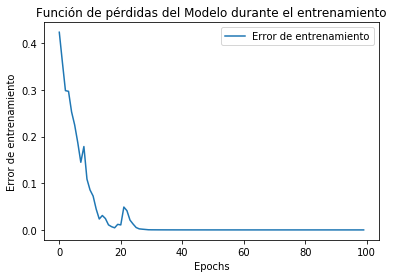

In [109]:
plt.plot(epochs_hist.history['loss'])
plt.title('Función de pérdidas del Modelo durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Error de entrenamiento')
plt.legend(["Error de entrenamiento"])

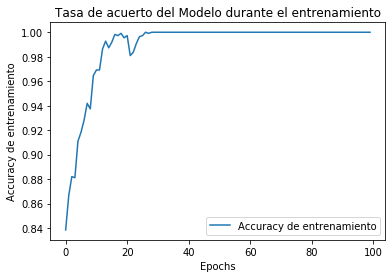

In [110]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Tasa de acuerto del Modelo durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy de entrenamiento')
plt.legend(["Accuracy de entrenamiento"])

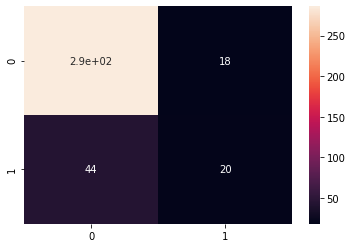

In [111]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       304
           1       0.53      0.31      0.39        64

    accuracy                           0.83       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.81      0.83      0.81       368



Our accuracy is still poor.